In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Users/sheetallalwani/Desktop/QVI_data.csv")

In [4]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


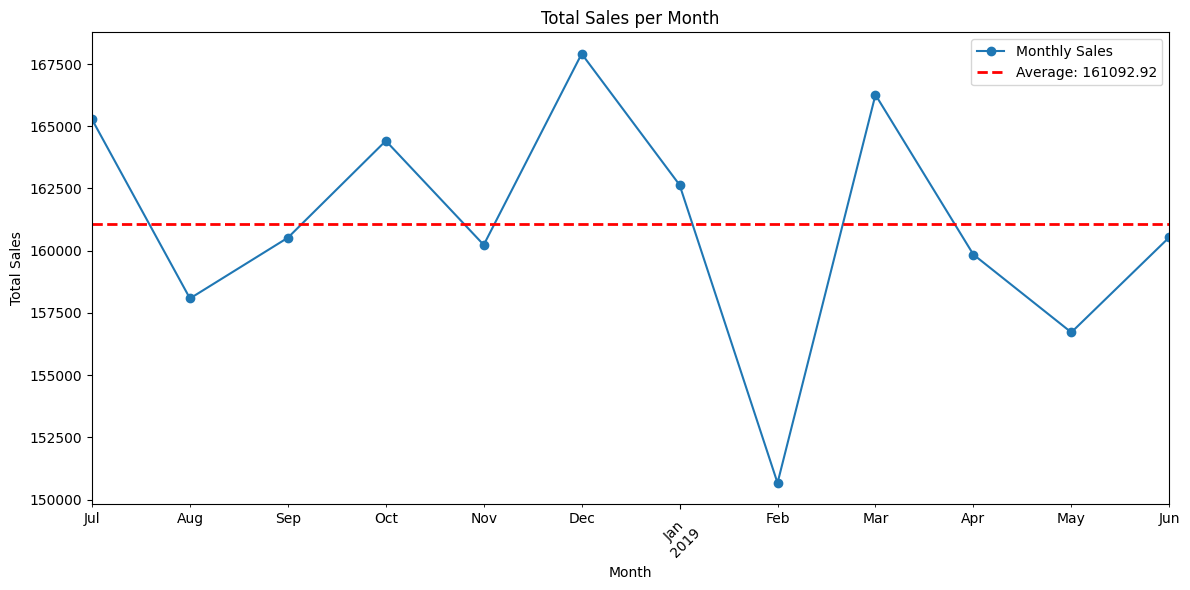

In [6]:
# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract year-month and group by month
df['YearMonth'] = df['DATE'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['TOT_SALES'].sum()

# Create the chart
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', label='Monthly Sales')

# Add average line
avg_sales = monthly_sales.mean()
plt.axhline(y=avg_sales, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_sales:.2f}')

plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

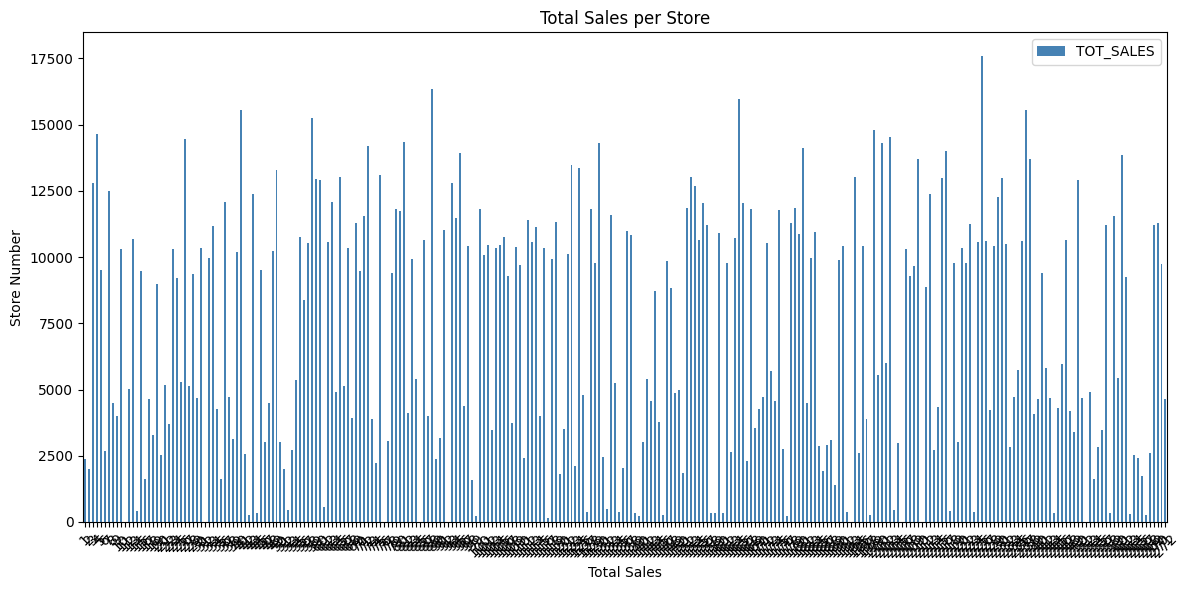

In [9]:
# Group sales by STORE_NBR
store_sales = df.groupby('STORE_NBR')['TOT_SALES'].sum()

# Create the chart
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar', color='steelblue')



plt.title('Total Sales per Store')
plt.ylabel('Store Number')
plt.xlabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

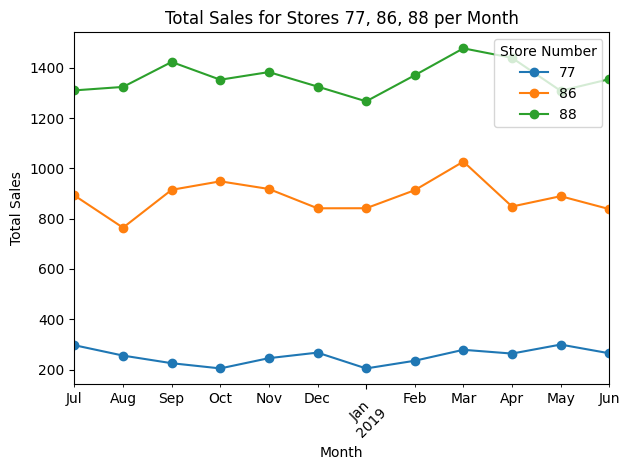

In [11]:
# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract year-month
df['YearMonth'] = df['DATE'].dt.to_period('M')

# Filter for stores 77, 86, 88
stores = [77, 86, 88]
filtered_df = df[df['STORE_NBR'].isin(stores)]

# Group by YearMonth and STORE_NBR, sum TOT_SALES
monthly_store_sales = filtered_df.groupby(['YearMonth', 'STORE_NBR'])['TOT_SALES'].sum().unstack()

# Create the chart
plt.figure(figsize=(14, 6))
monthly_store_sales.plot(kind='line', marker='o')

plt.title('Total Sales for Stores 77, 86, 88 per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Store Number')
plt.tight_layout()
plt.show()

In [13]:
def select_control_store(trial_store, df, metric='TOT_SALES'):
    """
    Select the best control store for a given trial store.
    
    Parameters:
    - trial_store: Store number to find a control for
    - df: DataFrame with store data
    - metric: Column to compare (default: TOT_SALES)
    
    Returns:
    - control_store: Best matching store number
    - similarity_score: How similar the stores are
    """
    
    # Get trial store metrics
    trial_data = df[df['STORE_NBR'] == trial_store].groupby('YearMonth')[metric].sum()
    trial_mean = trial_data.mean()
    trial_std = trial_data.std()
    
    # Calculate similarity with all other stores
    all_stores = df['STORE_NBR'].unique()
    best_match = None
    best_score = float('inf')
    
    for store in all_stores:
        if store == trial_store:
            continue
        
        # Get candidate store metrics
        candidate_data = df[df['STORE_NBR'] == store].groupby('YearMonth')[metric].sum()
        candidate_mean = candidate_data.mean()
        candidate_std = candidate_data.std()
        
        # Calculate difference (lower is better)
        mean_diff = abs(trial_mean - candidate_mean)
        std_diff = abs(trial_std - candidate_std)
        similarity = mean_diff + std_diff
        
        if similarity < best_score:
            best_score = similarity
            best_match = store
    
    return best_match, best_score

# Usage example
control_77 = select_control_store(77, df)
control_86 = select_control_store(86, df)
control_88 = select_control_store(88, df)

print(f"Control for Store 77: Store {control_77[0]} (Score: {control_77[1]:.2f})")
print(f"Control for Store 86: Store {control_86[0]} (Score: {control_86[1]:.2f})")
print(f"Control for Store 88: Store {control_88[0]} (Score: {control_88[1]:.2f})")

Control for Store 77: Store 46 (Score: 2.86)
Control for Store 86: Store 155 (Score: 1.95)
Control for Store 88: Store 165 (Score: 66.66)


<Figure size 1600x700 with 0 Axes>

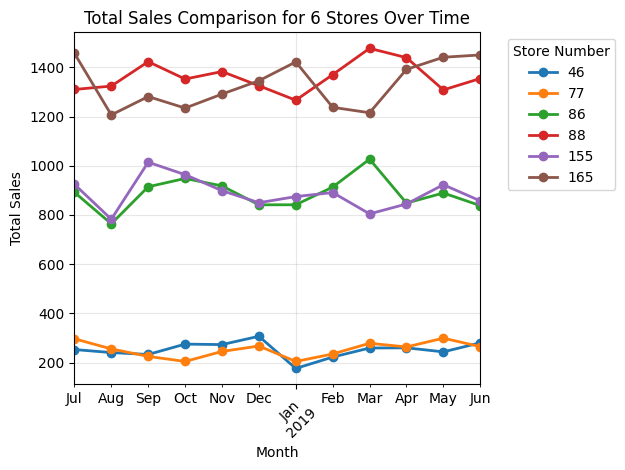

Summary Statistics:
STORE_NBR         46          77           86           88           155  \
count       12.000000   12.000000    12.000000    12.000000    12.000000   
mean       251.954167  253.333333   886.279167  1361.104167   885.745833   
std         33.155868   31.679168    66.707937    61.174766    65.290008   
min        176.200000  204.400000   764.050000  1266.400000   782.700000   
25%        238.775000  232.550000   841.350000  1320.350000   848.500000   
50%        256.100000  259.500000   890.750000  1353.500000   882.900000   
75%        273.600000  270.100000   915.450000  1392.850000   923.287500   
max        306.900000  299.300000  1026.800000  1477.200000  1014.400000   

STORE_NBR          165  
count        12.000000  
mean       1331.145833  
std          97.872225  
min        1206.600000  
25%        1236.725000  
50%        1318.300000  
75%        1426.762500  
max        1457.000000  


In [16]:
# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract year-month
df['YearMonth'] = df['DATE'].dt.to_period('M')

# Filter for 6 stores (you can modify store numbers as needed)
stores = [77, 86, 88, 46, 155, 165]  # Replace with your 6 store numbers
filtered_df = df[df['STORE_NBR'].isin(stores)]

# Group by YearMonth and STORE_NBR, sum TOT_SALES
monthly_store_sales = filtered_df.groupby(['YearMonth', 'STORE_NBR'])['TOT_SALES'].sum().unstack()

# Create the chart
plt.figure(figsize=(16, 7))
monthly_store_sales.plot(kind='line', marker='o', linewidth=2)

plt.title('Total Sales Comparison for 6 Stores Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Store Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(monthly_store_sales.describe())

Monthly Metrics for Stores 165 and 88:
                     TOT_SALES  Customer_Visits  Total_Transactions  \
YearMonth STORE_NBR                                                   
2018-07   88           1310.00              129                 153   
          165          1457.00              133                 167   
2018-08   88           1323.80              131                 160   
          165          1206.60              109                 140   
2018-09   88           1423.00              124                 159   
          165          1281.20              122                 144   
2018-10   88           1352.40              123                 158   
          165          1234.40              118                 140   
2018-11   88           1382.80              130                 157   
          165          1291.20              126                 149   
2018-12   88           1325.20              126                 149   
          165          1345.40        

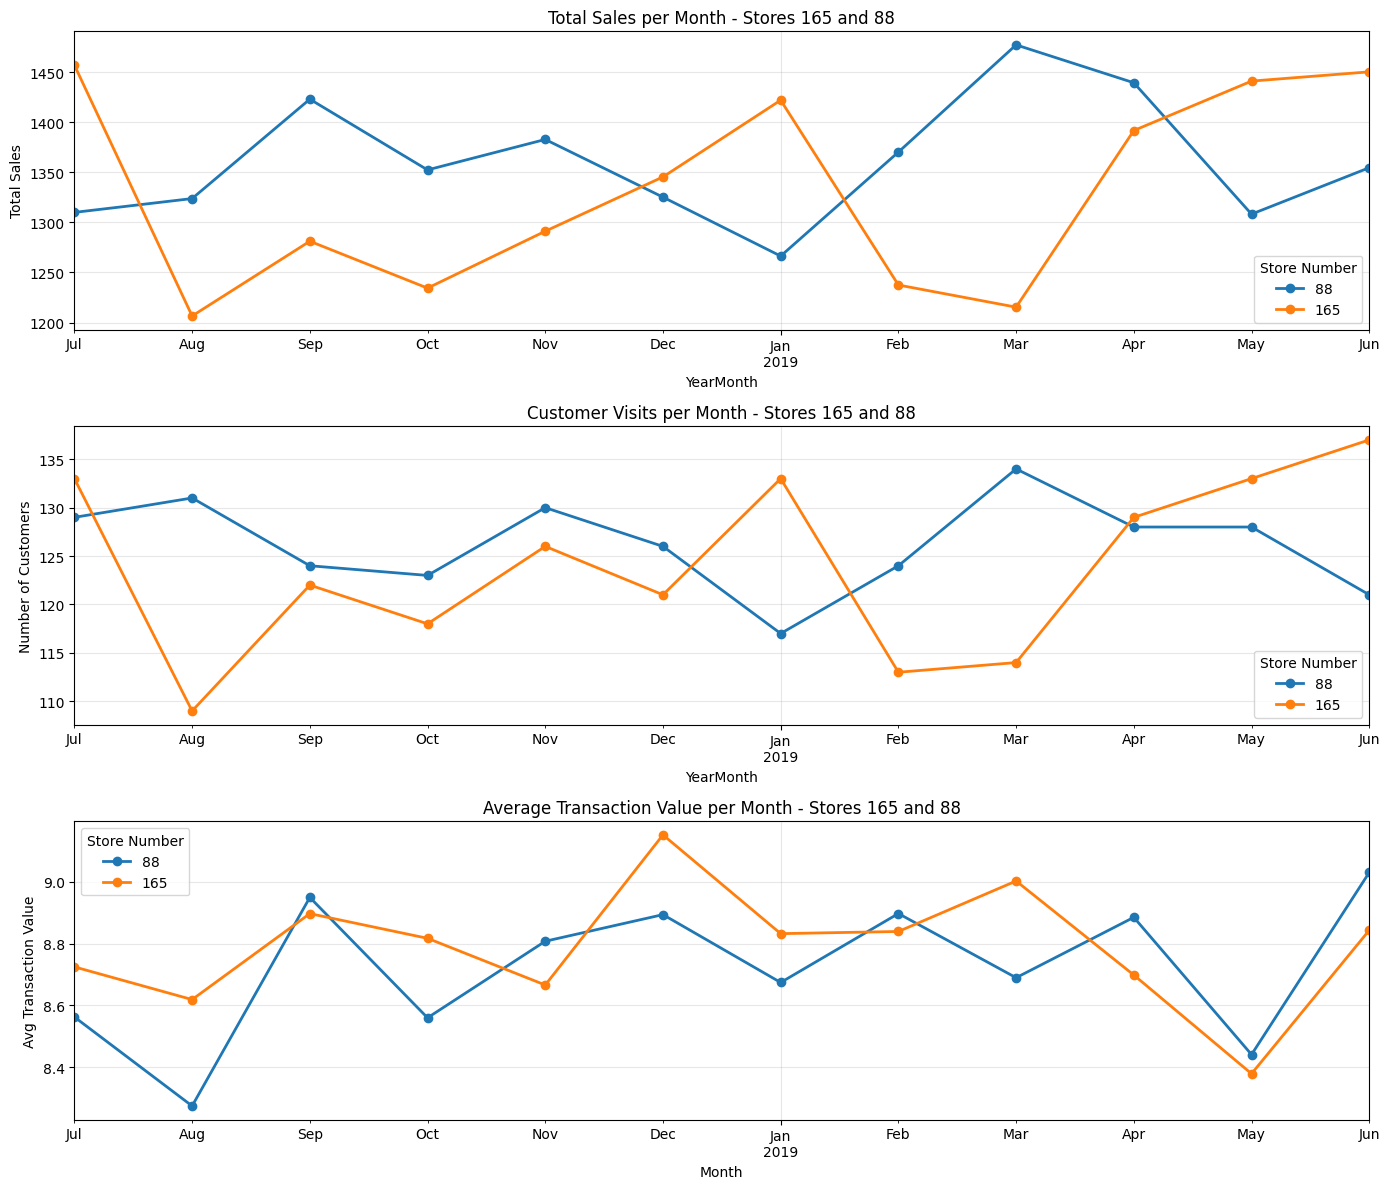

In [19]:
# Filter for stores 165 and 88
stores = [165, 88]
filtered_df = df[df['STORE_NBR'].isin(stores)]

# Group by YearMonth and STORE_NBR
# Calculate: Total Sales, Customer Visits (unique customers), Avg Transaction
monthly_metrics = filtered_df.groupby(['YearMonth', 'STORE_NBR']).agg({
    'TOT_SALES': 'sum',  # Total sales
    'LYLTY_CARD_NBR': 'nunique',  # Number of unique customers (visits)
    'TXN_ID': 'count'  # Total transactions
}).rename(columns={'LYLTY_CARD_NBR': 'Customer_Visits', 'TXN_ID': 'Total_Transactions'})

# Calculate average transaction value
monthly_metrics['Avg_Transaction'] = monthly_metrics['TOT_SALES'] / monthly_metrics['Total_Transactions']

print("Monthly Metrics for Stores 165 and 88:")
print(monthly_metrics)

# Unstack for visualization
sales_data = monthly_metrics['TOT_SALES'].unstack()
visits_data = monthly_metrics['Customer_Visits'].unstack()
avg_txn_data = monthly_metrics['Avg_Transaction'].unstack()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Total Sales
sales_data.plot(kind='line', marker='o', ax=axes[0], linewidth=2)
axes[0].set_title('Total Sales per Month - Stores 165 and 88')
axes[0].set_ylabel('Total Sales')
axes[0].legend(title='Store Number')
axes[0].grid(True, alpha=0.3)

# Plot 2: Customer Visits
visits_data.plot(kind='line', marker='o', ax=axes[1], linewidth=2)
axes[1].set_title('Customer Visits per Month - Stores 165 and 88')
axes[1].set_ylabel('Number of Customers')
axes[1].legend(title='Store Number')
axes[1].grid(True, alpha=0.3)

# Plot 3: Average Transaction Value
avg_txn_data.plot(kind='line', marker='o', ax=axes[2], linewidth=2)
axes[2].set_title('Average Transaction Value per Month - Stores 165 and 88')
axes[2].set_ylabel('Avg Transaction Value')
axes[2].set_xlabel('Month')
axes[2].legend(title='Store Number')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

March Metrics for Stores 165 and 88:
           TOT_SALES  Customer_Visits  Total_Transactions  Avg_Transaction
STORE_NBR                                                                 
88            1477.2              134                 170         8.689412
165           1215.4              114                 135         9.002963


/var/folders/tx/rp2sfqzx50z74cyry7hymp000000gn/T/ipykernel_2258/4198935887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['DATE'].dt.month


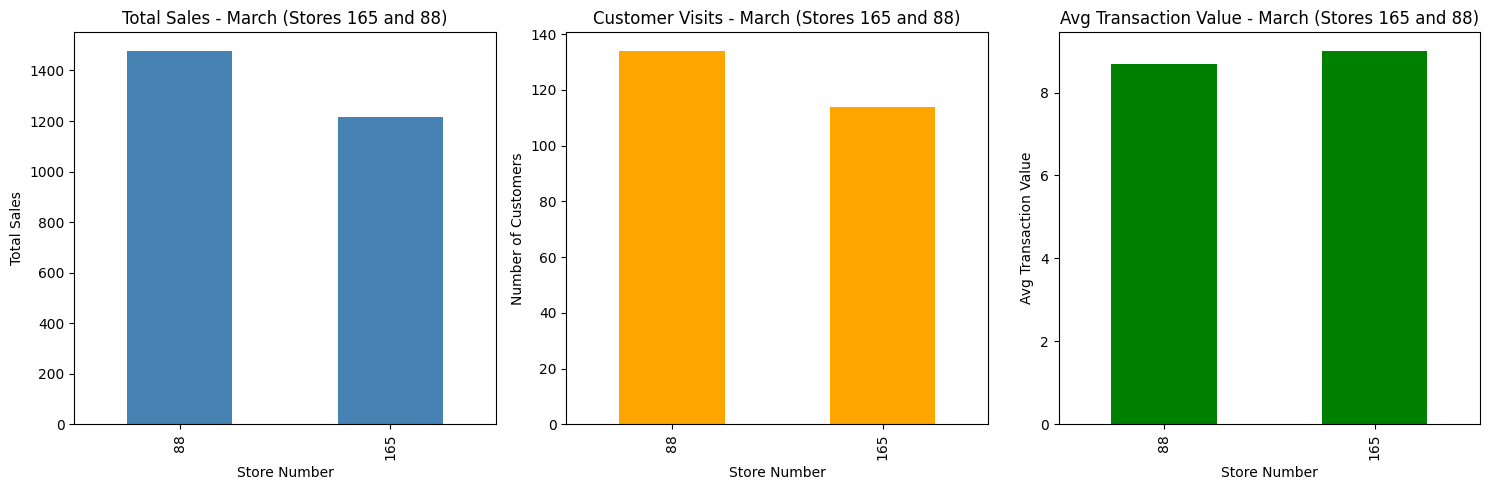

In [21]:
# Filter for stores 165 and 88
stores = [165, 88]
filtered_df = df[df['STORE_NBR'].isin(stores)]

# Extract month from DATE
filtered_df['Month'] = filtered_df['DATE'].dt.month

# Filter for March only (month = 3)
march_df = filtered_df[filtered_df['Month'] == 3]

# Group by STORE_NBR and calculate metrics
march_metrics = march_df.groupby('STORE_NBR').agg({
    'TOT_SALES': 'sum',  # Total sales
    'LYLTY_CARD_NBR': 'nunique',  # Number of unique customers (visits)
    'TXN_ID': 'count'  # Total transactions
}).rename(columns={'LYLTY_CARD_NBR': 'Customer_Visits', 'TXN_ID': 'Total_Transactions'})

# Calculate average transaction value
march_metrics['Avg_Transaction'] = march_metrics['TOT_SALES'] / march_metrics['Total_Transactions']

print("March Metrics for Stores 165 and 88:")
print(march_metrics)

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Total Sales
march_metrics['TOT_SALES'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Total Sales - March (Stores 165 and 88)')
axes[0].set_ylabel('Total Sales')
axes[0].set_xlabel('Store Number')

# Plot 2: Customer Visits
march_metrics['Customer_Visits'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Customer Visits - March (Stores 165 and 88)')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xlabel('Store Number')

# Plot 3: Average Transaction Value
march_metrics['Avg_Transaction'].plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('Avg Transaction Value - March (Stores 165 and 88)')
axes[2].set_ylabel('Avg Transaction Value')
axes[2].set_xlabel('Store Number')

plt.tight_layout()
plt.show()